In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import re

In [2]:
### reading the data set 
Fraud_Detection_Data = pd.read_csv('PS_20174392719_1491204439457_log.csv', sep = ',')


In [3]:
Fraud_Detection_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
def missing_value(df): 
    null_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
    null_data.columns = ['Column Name', 'Null Values Percentage']
    fig = plt.figure(figsize=(18,6))
    ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_data,color='blue')
    plt.xticks(rotation =90,fontsize =14)
    ax.axhline(40, ls='--',color='red')
    plt.title("Percentage of Missing values in application data")
    plt.ylabel("Null Values PERCENTAGE")
    plt.xlabel("COLUMNS")
    plt.show()

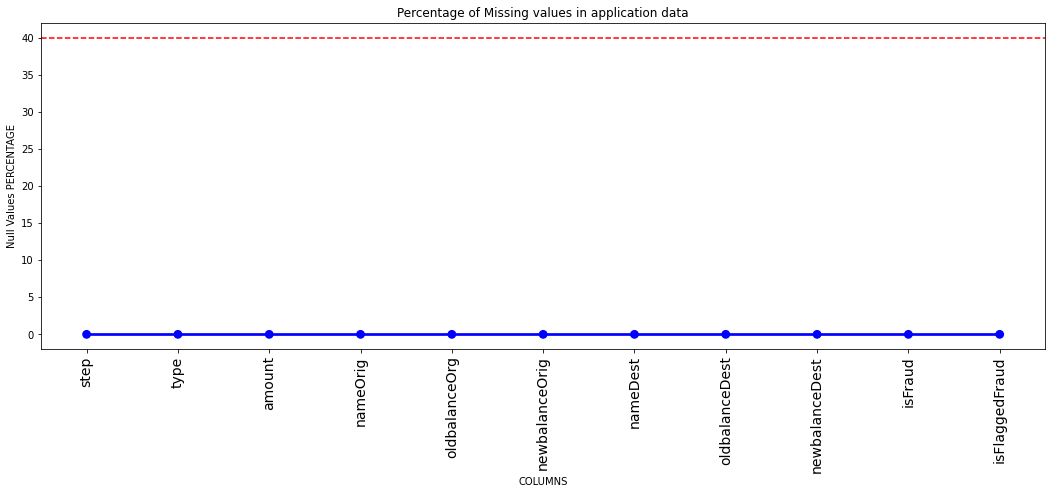

In [5]:
missing_value(Fraud_Detection_Data)

In [6]:
def plotfunc(df,col,title,hue =None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [7]:
def category_plotly_plot(df, column_name_1, column_name_2): 
    fig = px.scatter(df, x=column_name_1, y=column_name_2, color=column_name_1,
                     template='plotly_dark', hover_data=[column_name_1])
    
    fig.show()

In [9]:
#category_plotly_plot(Fraud_Detection_Data,'type', 'amount')

fig = go.Figure(data=[go.Pie(labels=Fraud_Detection_Data['type'], values=Fraud_Detection_Data['amount'], textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [11]:
def Extract_Customer(df, column_name, list_name):
    """
    Extract keywords from the specified column in the DataFrame.

    Parameters:
    - df: DataFrame
    - column_name: str, the column containing job descriptions 
    - list_name: list of str, keywords to extract

    Returns:
    - DataFrame with additional columns for each keyword
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")


    # Convert the specified column to lowercase and remove non-alphanumeric characters
    df[column_name] = df[column_name].astype(str).str.lower().replace('[^\w\s]', '', regex=True)

    # Use list comprehension to create binary columns for each keyword
    for word in list_name:
        df[word] = df[column_name].str.contains(r'\b' + re.escape(word) + r'\b', regex=True).astype(int)

    return df

In [12]:
#Extract_Customer(Fraud_Detection_Data,'nameOrig', ['M','C'])

Fraud_Customer_Count =  df_copy[(df_copy['nameDest_first_letter']=='Customer') & (df_copy['isFraud']==1)].shape[0]
Fraud_Count = df_copy[df_copy['isFraud']==1].shape[0]
Customer_Percentage_out_of_Fraud = (Fraud_Customer_Count/Fraud_Count) * 100
print(f"Count of Customer Transactions: {f'{Fraud_Customer_Count:,.0f}'}")
print(f"% of Customer out of fraud Transactions: {f'{Customer_Percentage_out_of_Fraud:,.0f}'}")


In [14]:
df_copy = Fraud_Detection_Data.copy();
df_copy['nameDest_first_letter'] = df_copy['nameDest'].str[0]
df_copy['nameDest_first_letter'] = df_copy['nameDest_first_letter'].replace('C', 'Customer')
df_copy['nameDest_first_letter'] = df_copy['nameDest_first_letter'].replace('M', 'Merchant')

In [47]:
Fraud_Merchant_Count = df_copy[(df_copy['nameDest_first_letter']=='Customer') & (df_copy['isFraud']==1)].shape[0]

In [48]:
Fraud_Merchant_Count

8213

In [51]:
df_copy[(df_copy['nameDest_first_letter']=='Customer') & (df_copy['isFraud']==1)].shape[0]

8213